# Import image

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

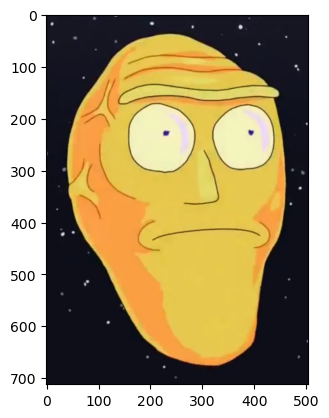

In [2]:
loc_input_img = os.path.join('..', 'data', 'input', 'showmewhatyougot.png')
image = Image.open(loc_input_img)
np_image = np.array(image)
plt.imshow(np_image)
plt.show()

# Square

In [3]:
def make_square(im, pad_val):
    (a, b) = im.shape[0:2]
    if a > b:
        pad_size = ((0,0),((a-b)//2,(a-b)-((a-b)//2)),(0,0))
    else:
        pad_size = (((b-a)//2,(b-a)-((b-a)//2)),(0,0),(0,0))
    return np.pad(im, pad_size, mode = 'minimum')

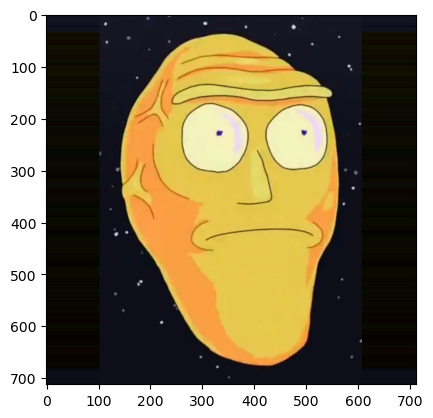

In [4]:
im_square = np_image.copy()
im_square = make_square(im_square, 0)
plt.imshow(im_square)
plt.show()

# Tiles

In [18]:
def tile_floor(im, floor_width, floor_length):
    tile_matrix = np.array([[[0 for i in range(1)] for j in range(floor_width)] for k in range(floor_length)])
    floor_size = tile_matrix.shape
    return np.tile(im, floor_size)

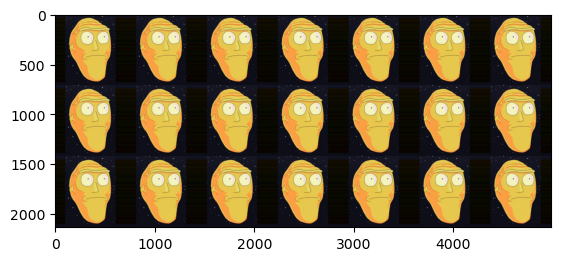

In [19]:
im_tiles = im_square.copy()
im_tiles = tile_floor(im_tiles, 7, 3)
plt.imshow(im_tiles)
plt.show()

# Flips

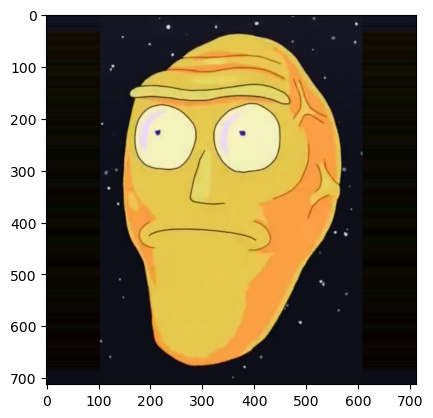

In [8]:
im_flip_leftright = im_square.copy()
im_flip_leftright = np.fliplr(im_flip_leftright)
plt.imshow(im_flip_leftright)
plt.show()

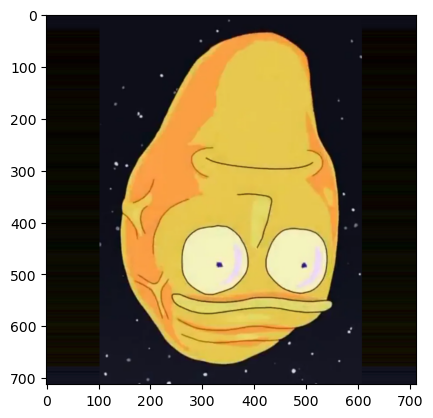

In [9]:
im_flip_updown = im_square.copy()
im_flip_updown = np.flipud(im_flip_updown)
plt.imshow(im_flip_updown)
plt.show()

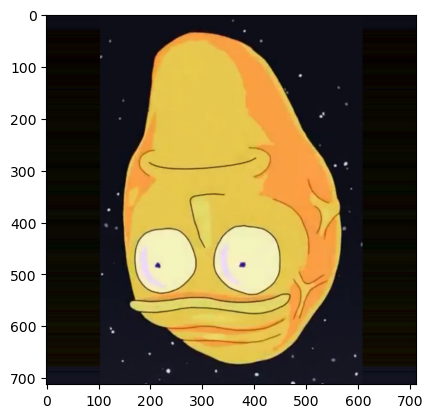

In [10]:
im_flip_both = im_square.copy()
im_flip_both = np.fliplr(np.flipud(im_flip_both))
plt.imshow(im_flip_both)
plt.show()

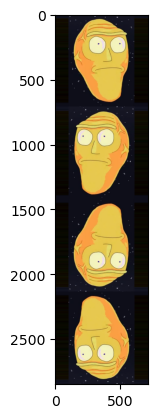

In [11]:
im_vert = im_square.copy()
im_vert = np.concatenate([im_square, im_flip_leftright, im_flip_updown, im_flip_both], axis = 0)
plt.imshow(im_vert)
plt.show()

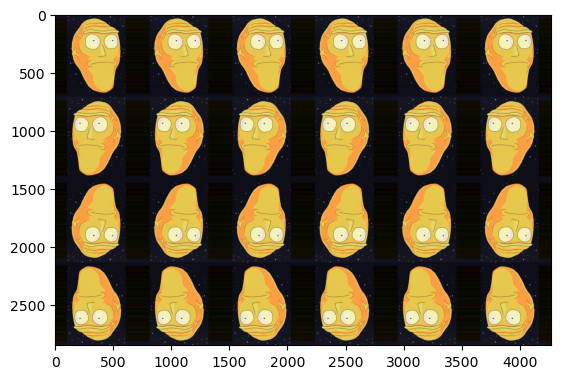

In [16]:
im_flips = im_vert.copy()
im_flips = np.tile(im_flips, (1, 6, 1))
plt.imshow(im_flips)
plt.show()

In [ ]:
#def grid_with_flips(im, matrix)


In [35]:
#input length max 4 of opnieuw? => concatenate flip matrix!! eerste kolom... OF transpose en dan itereren over matrix..?

In [21]:
grid_length = 4
grid_width = 6
flip_matrix = np.array([[j for i in range(grid_width)] for j in range(grid_length)])
print(flip_matrix.shape)
flip_matrix

(4, 6)


array([[0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3]])

In [33]:
dict_fun = {
    '0' : im_square,
    '1' : im_flip_leftright,
    '2' : im_flip_updown,
    '3' : im_flip_both
}

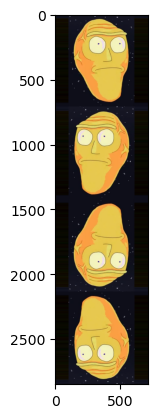

In [34]:
im_vert = im_square.copy()
im_vert = np.concatenate([dict_fun['0'], dict_fun['1'], dict_fun['2'], dict_fun['3']], axis = 0)
plt.imshow(im_vert)
plt.show()